## Practicum 2 

## Predict of Diabetes hospital readmissions

###### Team:
###### Satwick Bodduna (11810077)
###### V .Venkata Sai Kushwanth Reddy (11810002)

In [1]:
#Importing requried packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
from sklearn import preprocessing

In [2]:
#Importing the dataset
diabetic_data_temp=pd.read_csv("diabetic_data.csv")

In [3]:
print("diabetic_data_temp shape",diabetic_data_temp.shape)   #Checking the shape of the Data
Orginal_Shape=diabetic_data_temp.shape[0]  #Storing shape of the data into the variable for furthe use
print(diabetic_data_temp.info()) #Checking the Datatypes

diabetic_data_temp shape (101766, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null i

In [4]:
#Checking the data 
diabetic_data_temp.head() 

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
#Checking the col's
diabetic_data_temp.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
#Taking a copy of the data into new data frame further processing
diabetic_data=diabetic_data_temp.copy()

#  Data Analysis (EDA)

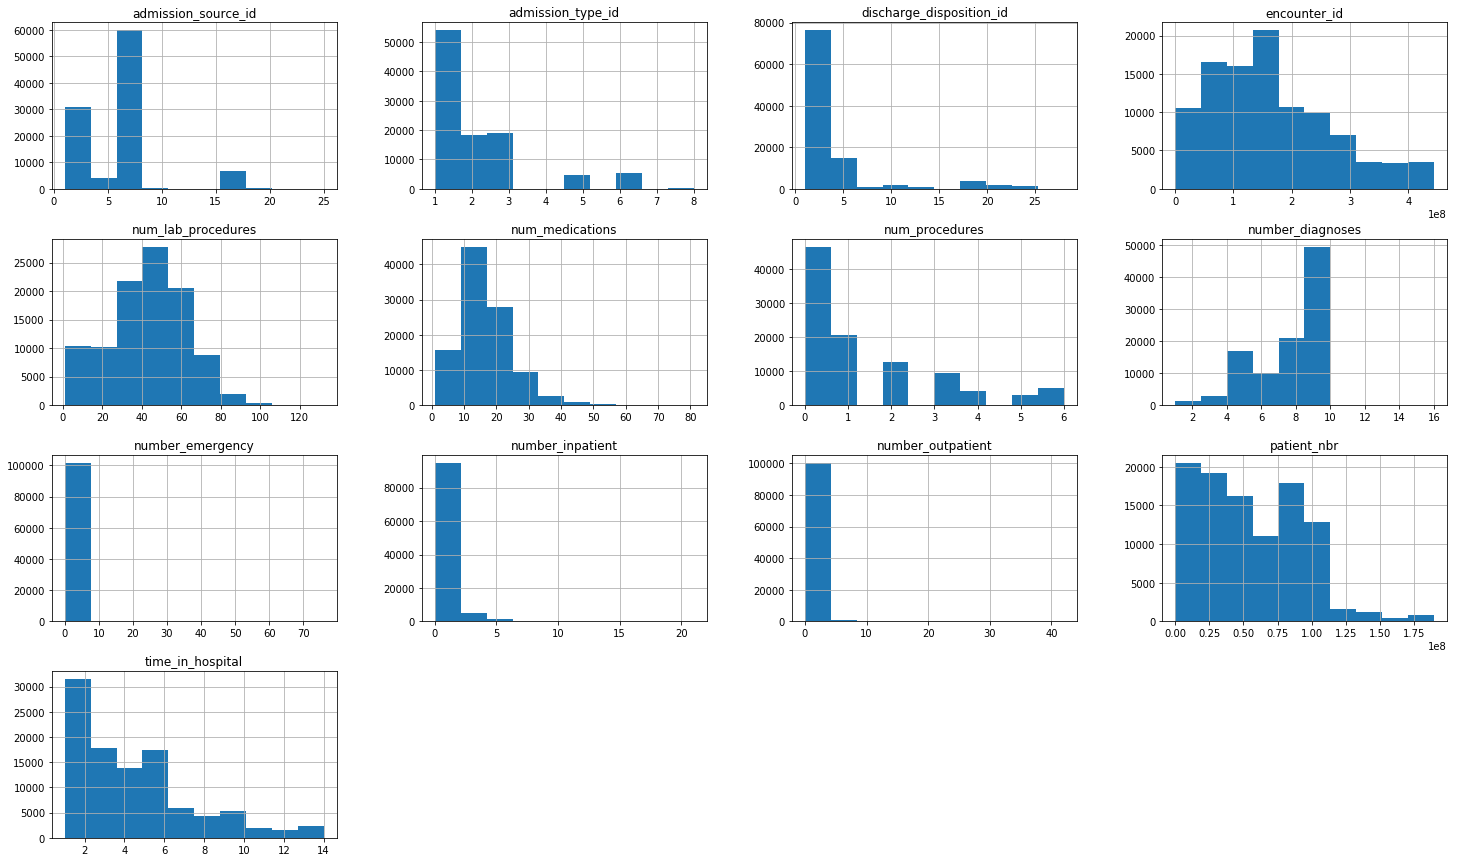

In [7]:
#Exploring histograms of numerical columns 
diabetic_data_temp.hist(bins=10, figsize=(25,15))
plt.show()


C:\Users\satwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


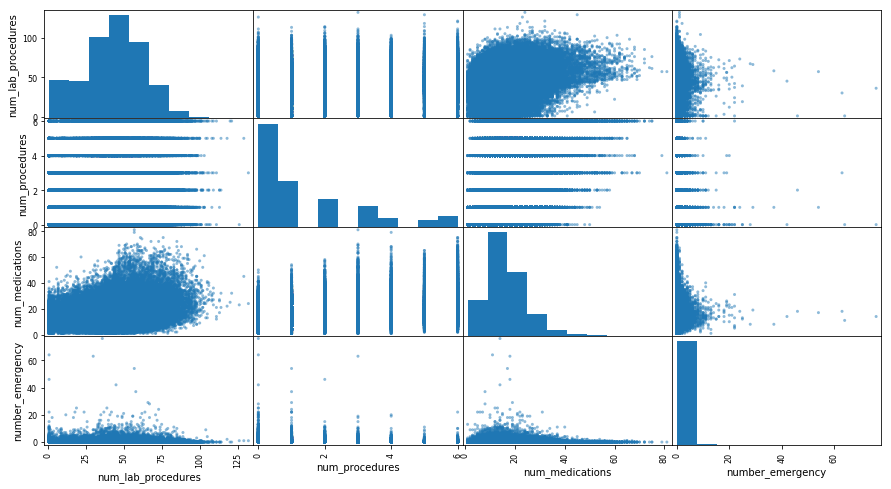

In [8]:
# Verifying relation between counting columns in the data
pd.scatter_matrix(diabetic_data_temp[['num_lab_procedures','num_procedures', 'num_medications', 'number_emergency']], figsize = (15, 8))
plt.show()


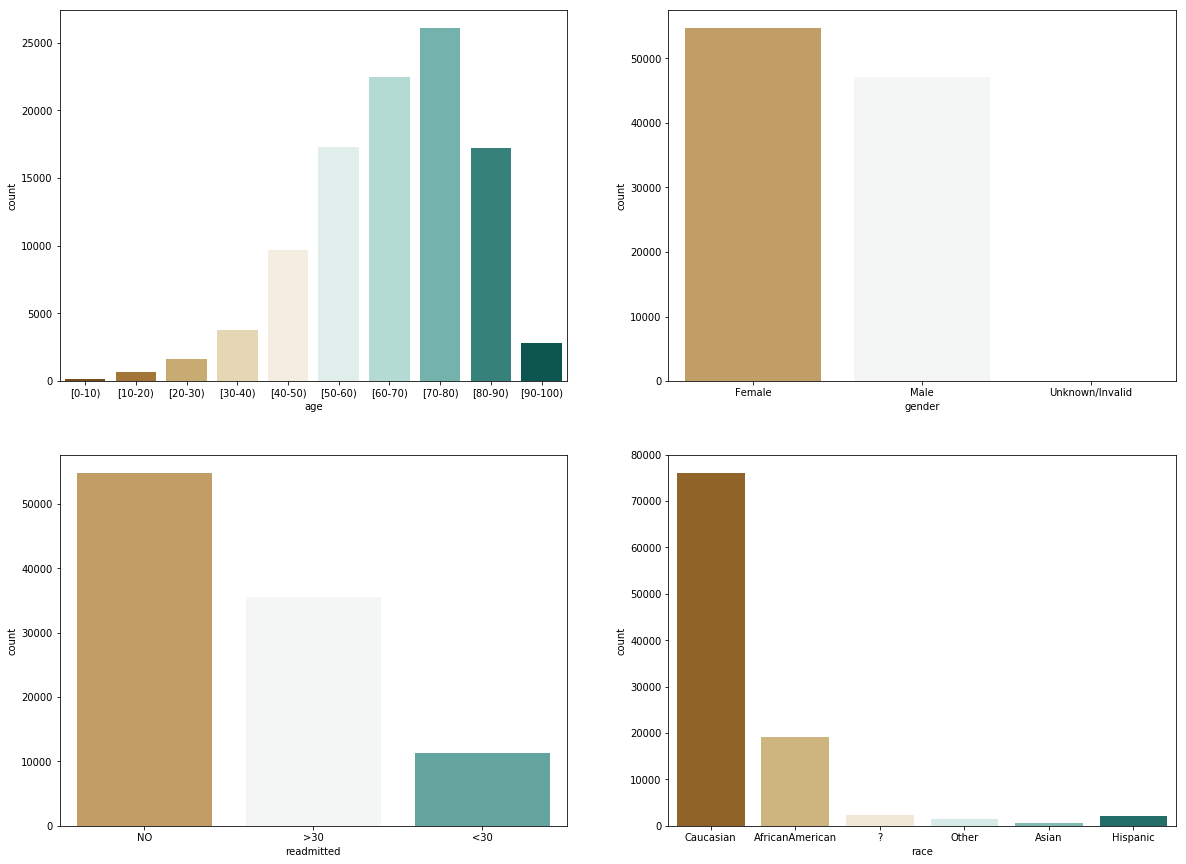

In [9]:
#Exploring ditribution of variables in the datset

fig, ax = plt.subplots(figsize=(20,15), ncols=2, nrows=2)
sns.countplot(x="age", data=diabetic_data_temp, ax=ax[0][0],palette="BrBG")
sns.countplot(x="gender", data=diabetic_data_temp, ax=ax[0][1],palette="BrBG")
sns.countplot(x="readmitted", data=diabetic_data_temp, ax=ax[1][0],palette="BrBG")
sns.countplot(x="race", data=diabetic_data_temp, ax=ax[1][1],palette="BrBG")

plt.show()

C:\Users\satwi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


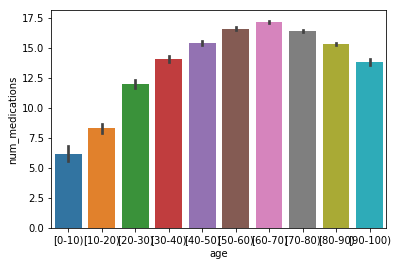

In [10]:
#frequency distribution of medications across age groups
ax = sns.barplot(x="age", y="num_medications", data=diabetic_data_temp)
plt.show()

### Data Cleaning 

In [11]:
#Checking for number of question marks in all the coloms 
for i in diabetic_data.columns:
    if diabetic_data[i].dtype =='object':
        x=(i,diabetic_data[i][diabetic_data[i]=='?'].count())
        if x[1]>0:#printing which has values >0
            print(i,round(((x[1])/len(diabetic_data))*100,2))

race 2.23
weight 96.86
payer_code 39.56
medical_specialty 49.08
diag_1 0.02
diag_2 0.35
diag_3 1.4


In [12]:
#From Above information dropping the col's which have more than 2 %
diabetic_data=diabetic_data.drop(['payer_code','weight','medical_specialty'],axis=1)

In [13]:
#Checking number of unique attribute in field
for i in diabetic_data.columns:
    x=len(diabetic_data[i].unique())
    if x<=1:
        print(i,x)

examide 1
citoglipton 1


In [14]:
#from above information we have 2 cols with one unique record so it doent give any information for traning the model so
#we can drop those fields from the datafram
diabetic_data=diabetic_data.drop(['examide','citoglipton'],axis=1)

In [15]:
#Dropping rows which atleast dont have any of the diagnostics
droppingrowindex=set(diabetic_data[(diabetic_data['diag_1']=='?')&(diabetic_data['diag_2']=='?')&(diabetic_data['diag_3']=='?')].index)
index=list(set(diabetic_data.index)-set(droppingrowindex)) #checking the indexes 
diabetic_data=diabetic_data.loc[index]

In [16]:
#Checking the unqiue records of gender for dropping unwanted records
diabetic_data['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [17]:
#Dropping Gender which has 'Unknown/Invalid 'values
droppingrowindex_Gender=set(diabetic_data[(diabetic_data['gender']=='Unknown/Invalid')].index)
reindex=list(set(diabetic_data.index)-set(droppingrowindex_Gender))
diabetic_data=diabetic_data.loc[reindex]

In [18]:
# Removing the pateints from the dataset that are dead by checking the mapping sheet which they have provided.
diabetic_data = diabetic_data[((diabetic_data.discharge_disposition_id != 21) & 
                                          (diabetic_data.discharge_disposition_id != 19) &
                                          (diabetic_data.discharge_disposition_id != 14) & 
                                          (diabetic_data.discharge_disposition_id != 13) & 
                                          (diabetic_data.discharge_disposition_id != 20) & 
                                          (diabetic_data.discharge_disposition_id != 11))] 

In [19]:
#Dropping the race which has nulls in the data
diabetic_data = diabetic_data[diabetic_data['race'] != '?']
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [20]:
#Number of records from from the orginal dataset
Orginal_Shape-diabetic_data.shape[0]

4658

#### Feature Enginering 

In [21]:
#Mapping the Diseases codes with ICD (International Classification of Diseases)Groups
def icd_code():
    diseaseclassifications = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]
    
    dictcout = {}    
    count = 1
    for name, num in diseaseclassifications:
        for i in range(num):
            dictcout.update({str(count): name})  
            count += 1
    return dictcout
  

def map_icd(df, icd):
    import pandas as pd
    namecol = df.columns.tolist()
    for col in namecol:
        temp = [] 
        for num in df[col]:           
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else: 
                lkup = num.split('.')[0]
                temp.append(icd[lkup])           
        df.loc[:, col] = temp               
    return df 


updatedcol = ['diag_1', 'diag_2', 'diag_3']
icd = icd_code()
diabetic_data[updatedcol] = map_icd(diabetic_data[updatedcol], icd)

C:\Users\satwi\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [22]:
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


###### Converting Categorical values into Factors 

In [23]:
keys = ['rosiglitazone','glimepiride-pioglitazone','tolazamide','metformin','tolbutamide',  'glipizide', 'glyburide','repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
        'pioglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 
        'metformin-pioglitazone','metformin-rosiglitazone',  'glipizide-metformin', 
        'troglitazone', 'acetohexamide']
for col in keys:
    diabetic_data[col] = diabetic_data[col].replace('No', 0)
    diabetic_data[col] = diabetic_data[col].replace('Steady', 1)
    diabetic_data[col] = diabetic_data[col].replace('Up', 1)
    diabetic_data[col] = diabetic_data[col].replace('Down', 1) 

In [24]:
diabetic_data['change'] = diabetic_data['change'].replace('Ch', 1)
diabetic_data['change'] = diabetic_data['change'].replace('No', 0)

In [ ]:
diabetic_data['gender'] = diabetic_data['gender'].replace('Male', 1)
diabetic_data['gender'] = diabetic_data['gender'].replace('Female', 0)

In [ ]:
diabetic_data['diabetesMed'] = diabetic_data['diabetesMed'].replace('Yes', 1)
diabetic_data['diabetesMed'] = diabetic_data['diabetesMed'].replace('No', 0)

In [25]:
diabetic_data['admission_type_id'] = diabetic_data['admission_type_id'].replace(2,1)
diabetic_data['admission_type_id'] = diabetic_data['admission_type_id'].replace(7,1)
diabetic_data['admission_type_id'] = diabetic_data['admission_type_id'].replace(6,5)
diabetic_data['admission_type_id'] = diabetic_data['admission_type_id'].replace(8,5)

In [ ]:
diabetic_data['max_glu_serum'] = diabetic_data['max_glu_serum'].replace('>200', 1)
diabetic_data['max_glu_serum'] = diabetic_data['max_glu_serum'].replace('>300', 1)
diabetic_data['max_glu_serum'] = diabetic_data['max_glu_serum'].replace('Norm', 0)
diabetic_data['max_glu_serum'] = diabetic_data['max_glu_serum'].replace('None', 0)

In [ ]:
diabetic_data['A1Cresult'] = diabetic_data['A1Cresult'].replace('>7', 1)
diabetic_data['A1Cresult'] = diabetic_data['A1Cresult'].replace('>8', 1)
diabetic_data['A1Cresult'] = diabetic_data['A1Cresult'].replace('Norm', 0)
diabetic_data['A1Cresult'] = diabetic_data['A1Cresult'].replace('None', 0)

In [26]:
diabetic_data['readmitted'] = diabetic_data['readmitted'].replace('<30', 1)
diabetic_data['readmitted'] = diabetic_data['readmitted'].replace('>30', 0)
diabetic_data['readmitted'] = diabetic_data['readmitted'].replace('NO', 0)

In [27]:
age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
diabetic_data['age'] = diabetic_data.age.map(age_dict)
diabetic_data['age'] = diabetic_data['age'].astype('int64')

In [28]:
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,0,5,5,25,1,1,41,...,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,...,0,1,0,0,0,0,0,1,1,0
2,64410,86047875,AfricanAmerican,0,25,1,1,7,2,11,...,0,0,0,0,0,0,0,0,1,0
3,500364,82442376,Caucasian,1,35,1,1,7,2,44,...,0,1,0,0,0,0,0,1,1,0
4,16680,42519267,Caucasian,1,45,1,1,7,1,51,...,0,1,0,0,0,0,0,1,1,0


### Data Tranformation on Numerical Variables

#### Checking the data distribution for making transformation on the data

In [29]:
diabetic_data_temp=diabetic_data

In [30]:
diabetic_data_temp.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

C:\Users\satwi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


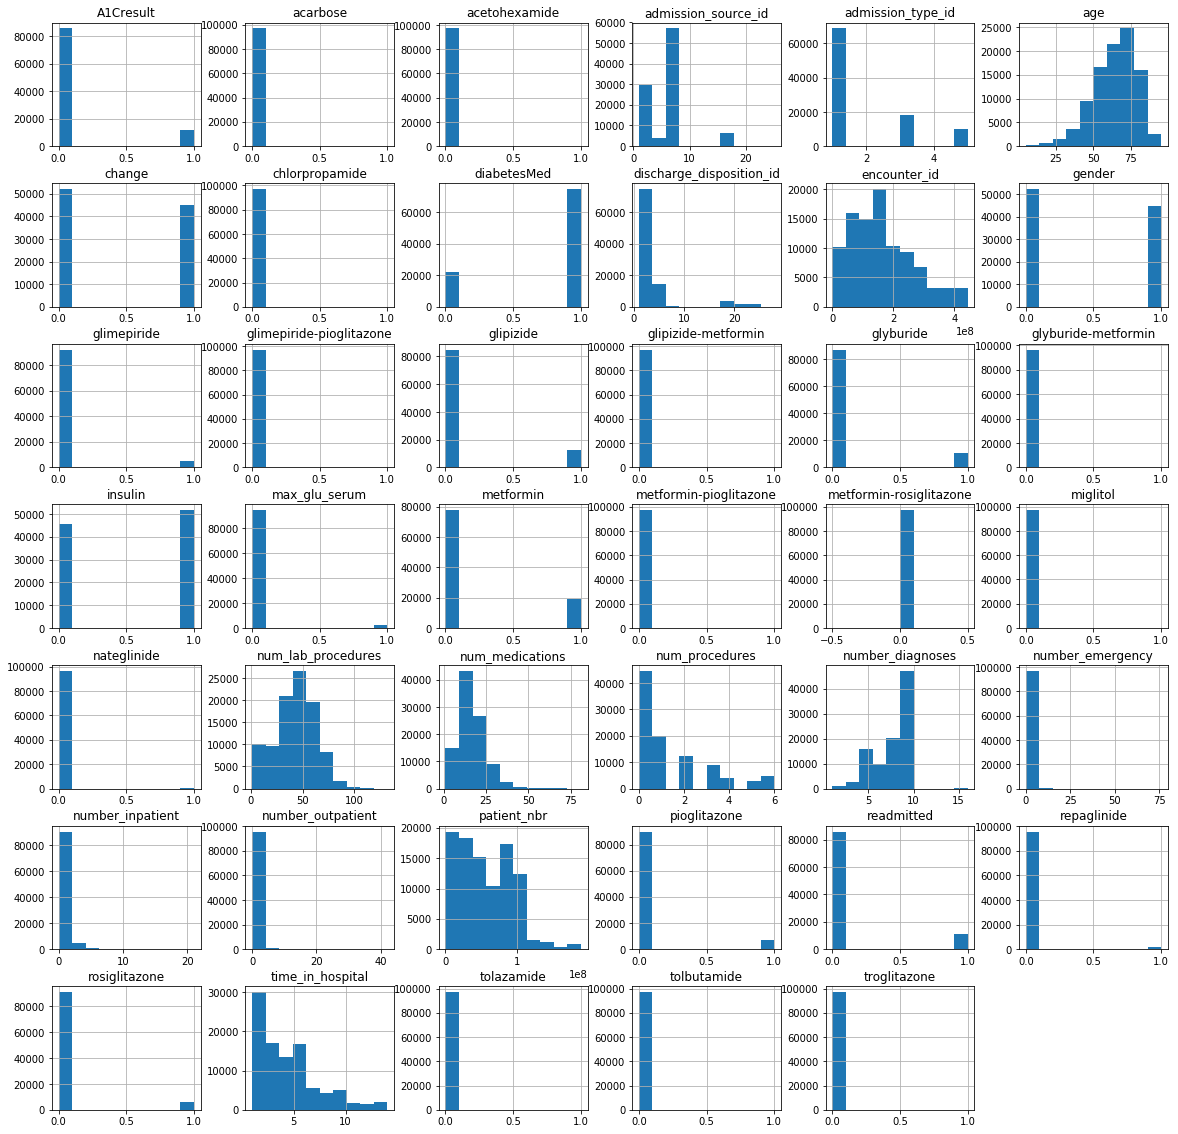

In [31]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
diabetic_data_temp.hist(ax = ax)
plt.show()

In [32]:
#Applying log transformation on 
#number_emergency
#num_medications
#number_inpatient
#number_outpatient
#applying log on continues and highly skewed and with high magnitude variables
diabetic_data['log_number_emergency']=np.log1p(diabetic_data_temp['number_emergency'])
diabetic_data['log_num_medications']=np.log1p(diabetic_data_temp['num_medications'])
diabetic_data['log_number_inpatient']=np.log1p(diabetic_data_temp['number_inpatient'])
diabetic_data['log_number_outpatient']=np.log1p(diabetic_data_temp['number_outpatient'])

In [33]:
#Dropping the coloum after changing them into log
diabetic_data=diabetic_data.drop(['number_emergency','num_medications','number_inpatient','number_outpatient'],axis=1)

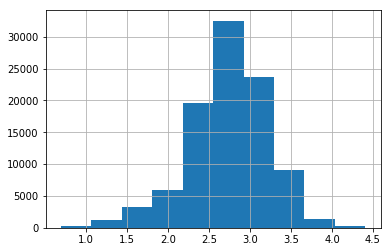

In [34]:
#Checking transformed coloum
diabetic_data['log_num_medications'].hist()

In [35]:
#Standardizing the numerical data as we used the log transforamtion
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [36]:
#diabetic_data.info()=='int64'
(diabetic_data.select_dtypes(include=['int64'])).columns

Index(['encounter_id', 'patient_nbr', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [37]:
int64=['time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'number_diagnoses']

admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 

In [38]:
diabetic_data[int64] = standardize(diabetic_data[int64])

In [39]:
#Number of records from from the orginal dataset
Orginal_Shape-diabetic_data.shape[0]

4658

for i in diabetic_data.columns:
    if diabetic_data[i].dtypes == 'object':
        diabetic_data[i]=diabetic_data[i].astype("category").cat.codes

In [40]:
for i in diabetic_data.columns:
    if(len(diabetic_data[i].unique()) <= 1):
        print(print(i,diabetic_data[i].unique()[:10],'length=',len(diabetic_data[i].unique())))
        print('===============================================================================')

metformin-rosiglitazone [0] length= 1
None


In [41]:
#Dropping the unique value variable in the data
diabetic_data = diabetic_data.drop(['metformin-rosiglitazone','glimepiride-pioglitazone'], axis = 1)

In [42]:
#From the research paper we are dropping the duplicate records from the data other than there first visit
diabetic_data = diabetic_data.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

In [43]:
Orginal_Shape-diabetic_data.shape[0]

33600

In [44]:
#Making the categories for assigned medical segments
diabetic_data['diag_1']=diabetic_data.diag_1.astype("category").cat.codes
diabetic_data['diag_2']=diabetic_data.diag_2.astype("category").cat.codes
diabetic_data['diag_3']=diabetic_data.diag_3.astype("category").cat.codes

In [45]:
diabetic_data_model = diabetic_data.drop(['encounter_id','patient_nbr','race'], axis = 1)

In [46]:
diabetic_data_model.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,diag_1,diag_2,...,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted,log_number_emergency,log_num_medications,log_number_inpatient,log_number_outpatient
0,0,5,5,25,1,-1.138528,-0.095884,-0.785073,4,18,...,0,0,0,0,0,0,0.0,0.693147,0.000000,0.000000
1,0,15,1,1,7,-0.465107,0.821092,-0.785073,4,4,...,0,0,0,1,1,0,0.0,2.944439,0.000000,0.000000
2,0,25,1,1,7,-0.801818,-1.624178,2.154736,13,4,...,0,0,0,0,1,0,0.0,2.639057,0.693147,1.098612
3,1,35,1,1,7,-0.801818,0.056945,-0.197111,7,4,...,0,0,0,1,1,0,0.0,2.833213,0.000000,0.000000
4,1,45,1,1,7,-1.138528,0.413547,-0.785073,11,11,...,0,0,0,1,1,0,0.0,2.197225,0.000000,0.000000


Exporting Data into csv for modeling

In [47]:
diabetic_data_model.to_csv("final_Modelused.csv",index=False )